In [1]:
#import các thư viện cần thiết 
import numpy as np 
import pandas as pd
import heapq

In [39]:
class Graph: 
    def __init__(self):
        """Khởi tạo đồ thị với danh sách kề rỗng"""
        self.graph = {}
    
    def load_csv (self, filename):
        """
        Đọc đồ thị từ file csv
        Mỗi dòng bao gồm (v_from, v_to, weight)

        """
        graph_csv = pd.read_csv(filename)
        for _, row in graph_csv.iterrows(): 
            #Sử dụng iterrows để truy cập các cột theo tên để không bị lỗi chuyển thành int
            v_from = row['v_from']
            v_to = row['v_to']
            weight = row['weight']

            #Đồ thị VÔ HƯỚNG nên khi thêm cạnh vào đồ thị thì phải thêm cả HAI CHIỀU
            self.add_edge(v_from, v_to, weight)
    
    def add_edge (self, v_from, v_to, weight):
        """ 
        Thêm cạnh vào danh sách kề của đồ thị 
        Nếu đỉnh chưa tồn tại trong danh sách kề thì tạo một danh sách kề mới
        """
        if v_from not in self.graph:
            self.graph[v_from] = []

        if v_to not in self.graph:
            self.graph[v_to] = []
        
        #Thêm cạnh HAI CHIỀU vì là đồ thị VÔ HƯỚNG 
        self.graph[v_from].append((v_to, weight))
        self.graph[v_to].append((v_from, weight))
    
    def Dijkstra(self, start, end):
        """ 
        Tìm đường đi ngắn nhất từ đỉnh bắt đầu (đỉnh nguồn) đến các đỉnh khác
        
        Trả về:
        - dist: Dictionary lưu khoảng cách ngắn nhất từ nguồn đến từng đỉnh.
        - prev: Dictionary lưu đỉnh trước đó trên đường đi ngắn nhất.
        """
        #Hàng đợi ưu tiên lấy đỉnh có khoảng cách nhỏ nhất
        pri_queue = [(0, start)] #(Khoảng cách, đỉnh)
        
        dist = {v: float('inf') for v in self.graph} #Infinity
        prev = {v: None for v in self.graph} #Undefined   
        
        dist[start] = 0

       
        while pri_queue:
            current_dist, current_node = heapq.heappop(pri_queue)

            #Bỏ qua nếu khoảng cách không tối ưu
            if current_dist > dist[current_node]:
                continue
            
            #Khám phá các đỉnh kề 
            for neighbor, weight in self.graph[current_node]:
                distance = dist[current_node] + weight
                if distance < dist[neighbor]:
                    dist[neighbor] = distance
                    prev[neighbor] = current_node

                    #Thêm vào hàng đợi ưu tiên
                    heapq.heappush(pri_queue, (distance, neighbor))
        
        path = []
        node = end
        while node is not None: 
            path.insert(0, node)
            node = prev[node]
        
        return path, distance
    
    def print_shortest_path(self, start, end):
        path, distance = self.Dijkstra(start, end)

        if path is None: 
            print(f'Không có đường đi từ {start} đến {end}.')
        else:
            print(f'Đường đi ngắn nhất từ {start} đến {end} là: {path}')
            print(f'Tổng khoảng cách đường đi là: {distance}')

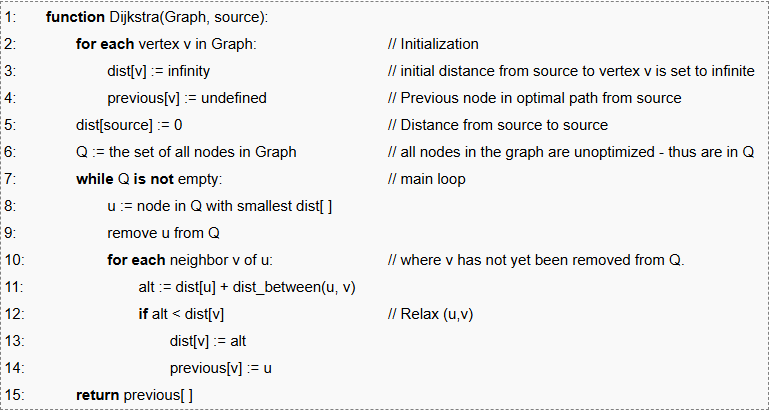

In [40]:
graph = Graph()
graph.load_csv(r'C:\Users\ASUS\Documents\GitHub\Final-LTPTDL\Graph.csv')

start = 'B'
end = 'F'

graph.print_shortest_path(start, end)

Đường đi ngắn nhất từ B đến F là: ['B', 'I', 'F']
Tổng khoảng cách đường đi là: 32


In [41]:
graph_csv = pd.read_csv(r'C:\Users\ASUS\Documents\GitHub\Final-LTPTDL\Graph.csv')
graph_csv

,v_from,v_to,weight
0,A,C,9
1,A,F,20
2,A,D,7
3,A,E,13
4,C,H,6
5,D,H,8
6,D,E,4
7,E,K,4
8,E,I,3
9,F,I,6


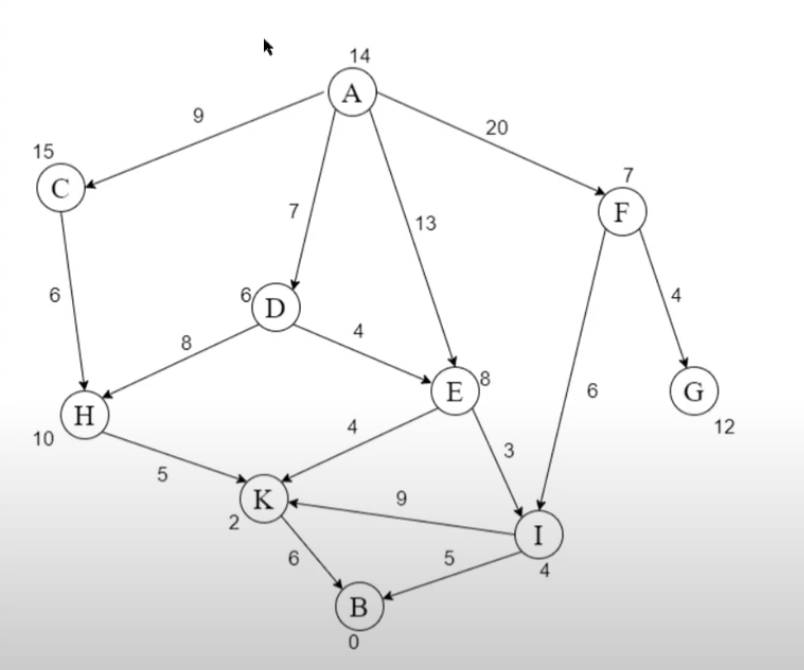